## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
22,19-03-2020,19-03-2020 00:00,785,381,86,278,2,25,3,1,...,390.0,395.0,0,1,2,0,0,0,0,0
23,20-03-2020,20-03-2020 00:00,1020,506,106,361,2,29,3,1,...,506.0,514.0,1,2,2,0,1,0,0,0
24,21-03-2020,21-03-2020 00:00,1280,644,137,448,3,31,3,5,...,649.0,631.0,4,4,3,0,1,0,0,0
25,22-03-2020,22-03-2020 00:00,1600,825,180,534,5,35,4,7,...,821.0,779.0,5,4,4,0,1,0,0,0
26,23-03-2020,23-03-2020 00:00,2060,1007,238,737,5,42,11,9,...,1080.0,980.0,9,5,8,0,1,0,0,0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 56 columns):
data                                 27 non-null object
data_dados                           27 non-null object
confirmados                          27 non-null int64
confirmados_arsnorte                 27 non-null int64
confirmados_arscentro                27 non-null int64
confirmados_arslvt                   27 non-null int64
confirmados_arsalentejo              27 non-null int64
confirmados_arsalgarve               27 non-null int64
confirmados_acores                   27 non-null int64
confirmados_madeira                  27 non-null int64
confirmados_estrangeiro              12 non-null float64
confirmados_novos                    27 non-null int64
recuperados                          27 non-null int64
obitos                               27 non-null int64
internados                           19 non-null float64
internados_uci                       10 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,12.000000,27.000000,...,5.000000,5.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.0,27.0,27.0
mean,333.111111,163.333333,34.962963,119.925926,0.703704,9.111111,1.111111,0.888889,6.583333,76.296296,...,689.200000,659.800000,0.703704,0.592593,0.777778,0.0,0.148148,0.0,0.0,0.0
std,552.636919,274.292096,62.856051,194.334946,1.488800,12.722885,2.342473,2.292686,3.423404,119.285957,...,271.475045,228.551307,2.053418,1.421247,1.783112,0.0,0.362014,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,390.000000,395.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,5.000000,2.500000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,4.750000,2.000000,...,506.000000,514.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,41.000000,27.000000,2.000000,10.000000,0.000000,2.000000,0.000000,0.000000,7.500000,9.000000,...,649.000000,631.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,389.500000,167.000000,41.000000,161.000000,0.000000,13.500000,1.000000,0.000000,9.000000,101.500000,...,821.000000,779.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.0
max,2060.000000,1007.000000,238.000000,737.000000,5.000000,42.000000,11.000000,9.000000,11.000000,460.000000,...,1080.000000,980.000000,9.000000,5.000000,8.000000,0.0,1.000000,0.0,0.0,0.0


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


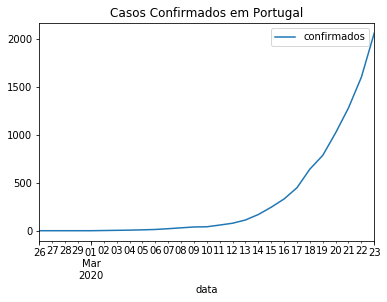

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

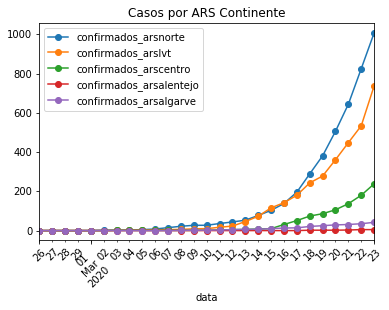

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

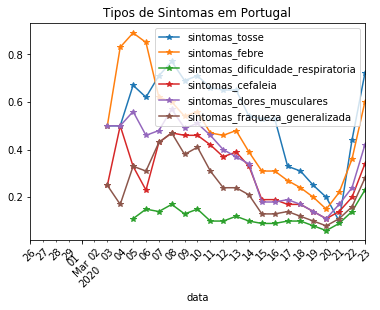

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

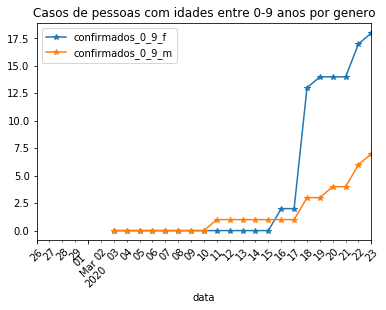

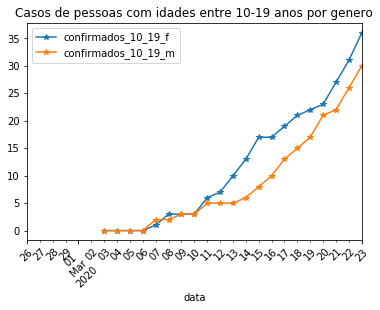

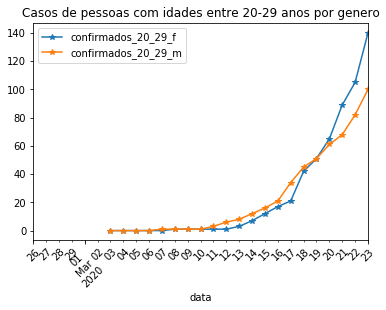

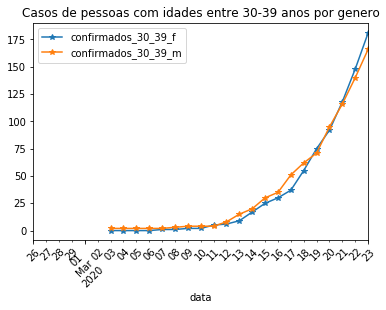

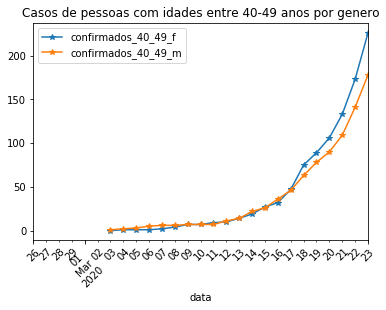

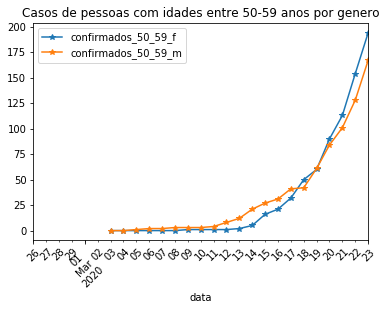

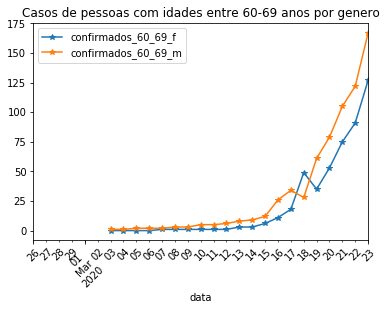

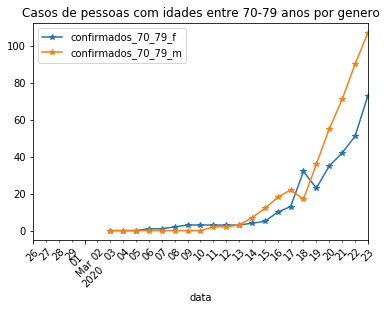

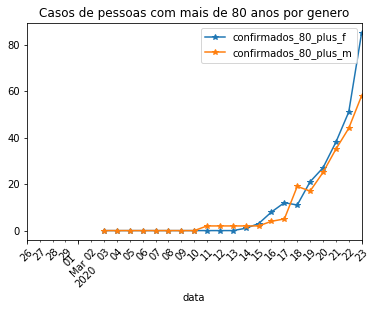

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


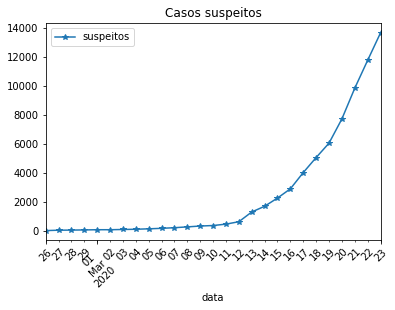

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

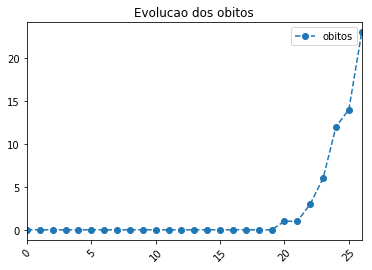

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:20]), x[:20])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           1.14e-20
Time:                        17:48:49   Log-Likelihood:                 8.0315
No. Observations:                  20   AIC:                            -12.06
Df Residuals:                      18   BIC:                            -10.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1634      0.074     15.815      0.000       1.009       1.318
x1             0.3268      0.007     49.368      0.000       0.313       0.341
==============================================================================
Omnibus:                        6.828   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.396
Skew:                          -0.819   Prob(JB):                        0.111
Kurtosis:                       4.609   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

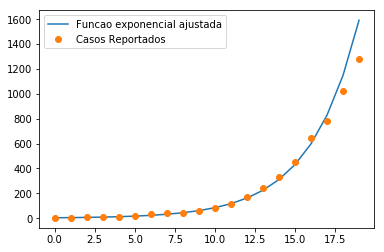

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:20])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:20], "o", label="Casos Reportados")
plt.legend()
plt.show()